## Importing Packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv('dataset_of_50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [3]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
df.info() ## There iss no null-values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


### Visualizing correlation between features

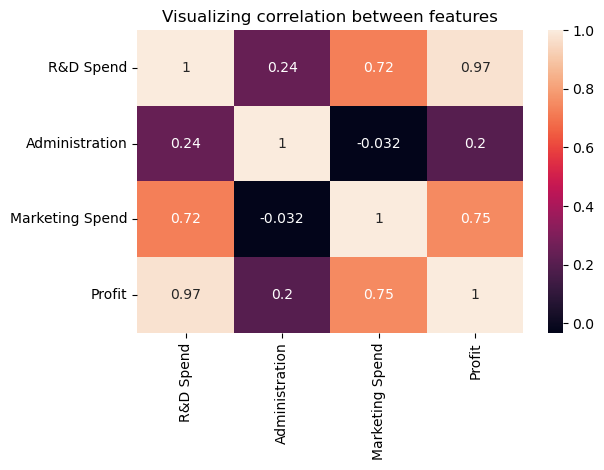

In [23]:
sns.heatmap(data=df.corr(),annot=True)
plt.title('Visualizing correlation between features')
plt.tight_layout()
plt.show()

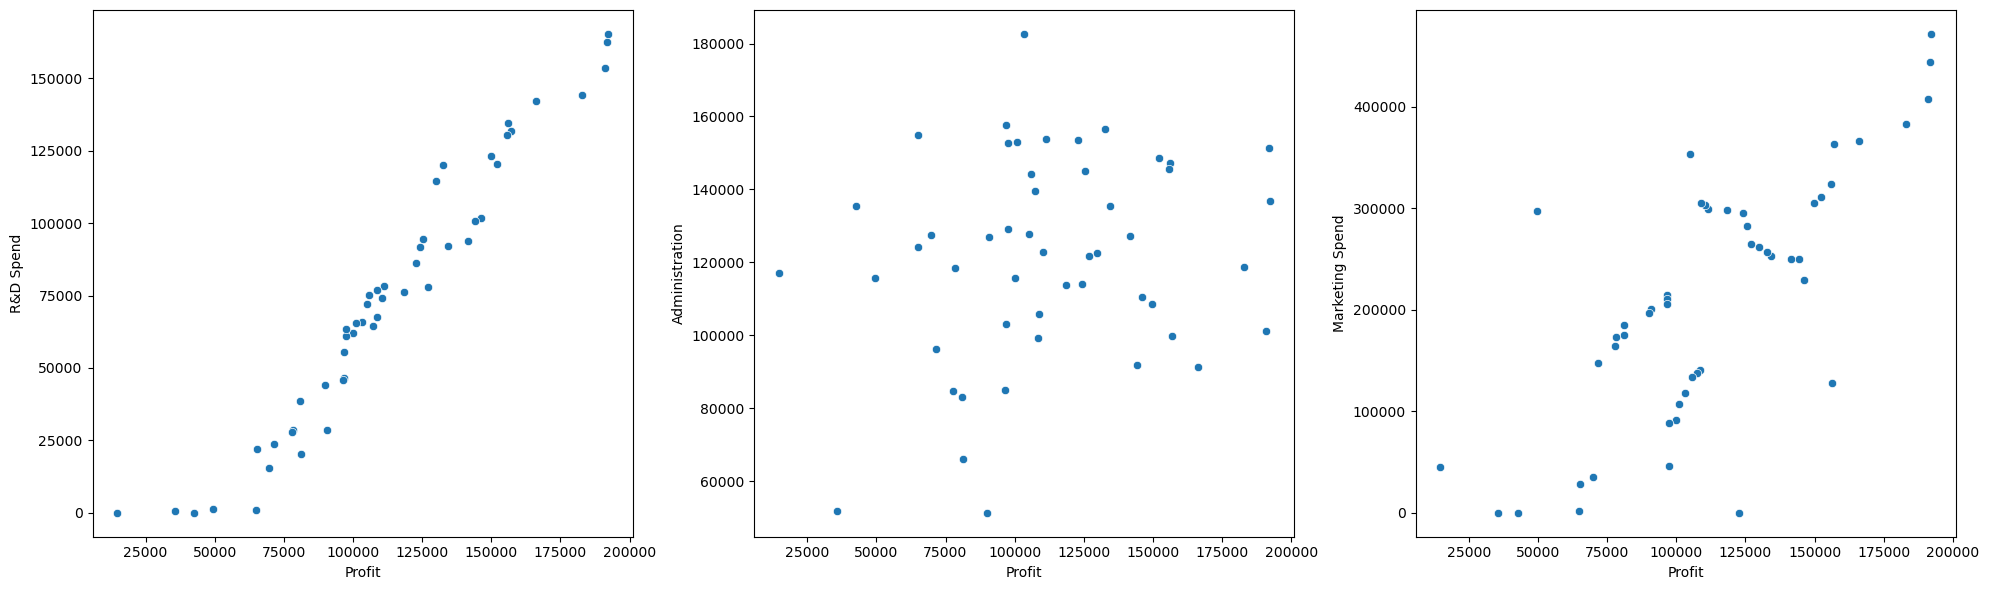

In [26]:
fig,axes=plt.subplots(1,3, figsize=(20,6))  

sns.scatterplot(data=df,
               x='Profit', y='R&D Spend',
               ax=axes[0])
sns.scatterplot(data=df,
               x='Profit', y='Administration',
               ax=axes[1])
sns.scatterplot(data=df,
               x='Profit', y='Marketing Spend',
               ax=axes[2])
plt.tight_layout()

## Linear Regression

In [12]:
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Features and Target
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and Training the Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

li_reg={"MAE": mean_absolute_error(y_test, y_pred),
       "MSE": mean_squared_error(y_test, y_pred),
       "R² Score": r2_score(y_test, y_pred)}

MAE: 6979.1522523704
MSE: 80926321.22295156
R² Score: 0.9000653083037321


## Lasso Regression

In [13]:
from sklearn.linear_model import Lasso,Ridge

# Initialize the Lasso Regression model
lasso_regressor = Lasso(alpha=1.0)  # alpha is the regularization strength

# Train the model
lasso_regressor.fit(X_train, y_train)

# Make predictions on the test set
lasso_y_pred = lasso_regressor.predict(X_test)

# Evaluate the model
mae=mean_absolute_error(y_test,lasso_y_pred)
mse = mean_squared_error(y_test, lasso_y_pred)
r2 = r2_score(y_test, lasso_y_pred)
print(f' Mean Absolute Error: {mae}')
print(f' Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


lasso_reg={"MAE": mean_absolute_error(y_test, lasso_y_pred),
       "MSE": mean_squared_error(y_test, lasso_y_pred),
       "R² Score": r2_score(y_test, lasso_y_pred)}

 Mean Absolute Error: 6979.152235475121
 Mean Squared Error: 80926320.76116836
R^2 Score: 0.9000653088739812


## Ridge Regression

In [14]:
# Initialize the Ridge Regression model
ridge_regressor = Ridge(alpha=1.0)  # alpha is the regularization strength

# Train the model
ridge_regressor.fit(X_train, y_train)

# Make predictions on the test set
ridge_y_pred = lasso_regressor.predict(X_test)

# Evaluate the model
mae=mean_absolute_error(y_test,ridge_y_pred)
mse = mean_squared_error(y_test, ridge_y_pred)
r2 = r2_score(y_test, ridge_y_pred)
print(f' Mean Absolute Error: {mae}')
print(f' Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

ridge_reg={"MAE": mean_absolute_error(y_test, ridge_y_pred),
       "MSE": mean_squared_error(y_test, ridge_y_pred),
       "R² Score": r2_score(y_test, ridge_y_pred)}

 Mean Absolute Error: 6979.152235475121
 Mean Squared Error: 80926320.76116836
R^2 Score: 0.9000653088739812


## Random Forest Regression

In [15]:

from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae=mean_absolute_error(y_test,rf_y_pred)
mse = mean_squared_error(y_test, rf_y_pred)
r2 = r2_score(y_test, rf_y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

rf_reg={"MAE": mean_absolute_error(y_test, rf_y_pred),
       "MSE": mean_squared_error(y_test, rf_y_pred),
       "R² Score": r2_score(y_test, rf_y_pred)}

Mean Absolute Error: 6437.497739999977
Mean Squared Error: 72625008.62306513
R^2 Score: 0.9103164738430438


## Comparing Different models 

In [19]:
matrix_models={'Linear Regression':li_reg,'Lasso regression':lasso_reg,
               'Ridge Regression':ridge_reg,'Random Forest Regression': rf_reg}
for model, matrix in matrix_models.items():
    print(f'{model}: {matrix}')

Linear Regression: {'MAE': 6979.1522523704, 'MSE': 80926321.22295156, 'R² Score': 0.9000653083037321}
Lasso regression: {'MAE': 6979.152235475121, 'MSE': 80926320.76116836, 'R² Score': 0.9000653088739812}
Ridge Regression: {'MAE': 6979.152235475121, 'MSE': 80926320.76116836, 'R² Score': 0.9000653088739812}
Random Forest Regression: {'MAE': 6437.497739999977, 'MSE': 72625008.62306513, 'R² Score': 0.9103164738430438}


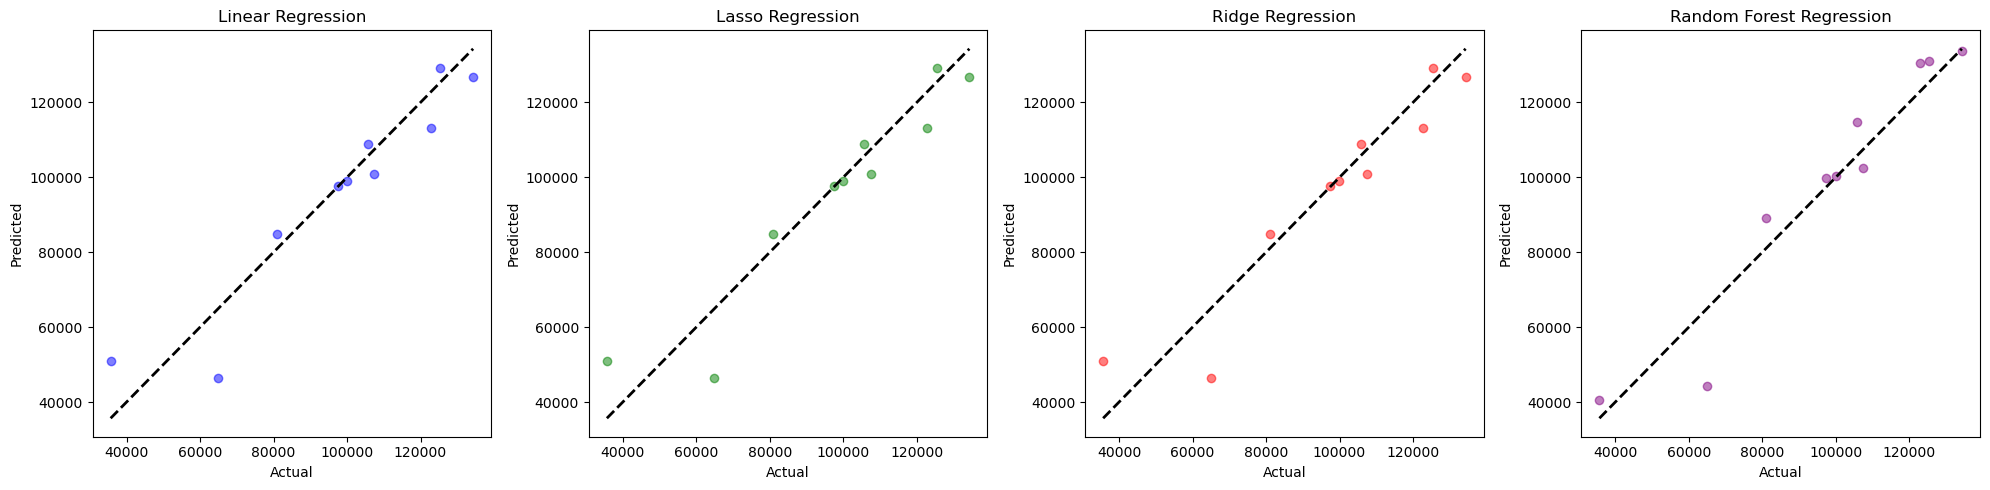

In [21]:
# Create a single figure to compare all models in one row
plt.figure(figsize=(20, 5))  # Adjust the figure size for better visualization

# Plot for Linear Regression
plt.subplot(1, 4, 1)  # 1 row, 4 columns, 1st subplot
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

# Plot for Lasso Regression
plt.subplot(1, 4, 2)  # 1 row, 4 columns, 2nd subplot
plt.scatter(y_test, lasso_y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression')

# Plot for Ridge Regression
plt.subplot(1, 4, 3)  # 1 row, 4 columns, 3rd subplot
plt.scatter(y_test, ridge_y_pred, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression')

# Plot for Random Forest Regression
plt.subplot(1, 4, 4)  # 1 row, 4 columns, 4th subplot
plt.scatter(y_test, rf_y_pred, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()